### Importing and basic EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import learning_curve, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, SCORERS

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#SVM (Support Vector Machine) Classifier
from sklearn.svm import SVC

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('final.csv')


In [3]:
print(df.shape)
print(df.columns)

(559585, 59)
Index(['Crash Descriptor', 'Number of Vehicles Involved', 'Hour', 'Month',
       'Straight_Road', 'Curve_Road', 'Level_Road', 'Grade_Road', 'Hill_Road',
       'T_HIGH_F', 'WIND_MPH', 'Rainy Road?', 'Foggy Road?', 'Icy Road?',
       'Clear Conditions?', 'Sunny Conditions?', 'Cloudy Conditions?',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'County Name_ALBANY', 'County Name_BROOME',
       'County Name_CATTARAUGUS', 'County Name_CLINTON',
       'County Name_DUTCHESS', 'County Name_ERIE', 'County Name_ESSEX',
       'County Name_FULTON', 'County Name_GREENE', 'County Name_JEFFERSON',
       'County Name_MONROE', 'County Name_NASSAU', 'County Name_ONEIDA',
       'County Name_ONONDAGA', 'County Name_ONTARIO', 'County Name_ORANGE',
       'County Name_OTSEGO', 'County Name_RENSSELAER', 'County Name_ROCKLAND',
       'County Name_SARATOGA

0    0.663638
1    0.336362
Name: Crash Descriptor, dtype: float64
There is a 66/33 split


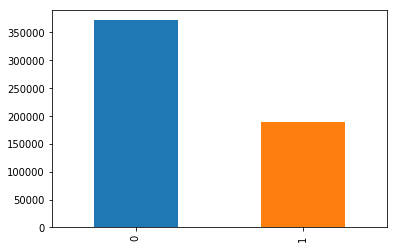

In [4]:
print(df['Crash Descriptor'].value_counts(normalize=True))
print("There is a 66/33 split")
df['Crash Descriptor'].value_counts().plot(kind='bar');

In [5]:
col_nums = len(df.columns)

### Modeling begins

In [5]:
print("Make sure the first column is Crash Descriptor. First Col: ", df.columns[0])
#if not then change the position and change this whole thing
y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train ,y_train, test_size=.25, random_state=1234)
print("Shapes of Xs", X.shape[0], X_train.shape[0], X_val.shape[0], X_val.shape[0])
print("Shapes of Ys", y.shape[0], y_train.shape[0], y_val.shape[0], y_val.shape[0])

Make sure the first column is Crash Descriptor. First Col:  Crash Descriptor
Shapes of Xs 559585 335751 111917 111917
Shapes of Ys 559585 335751 111917 111917


'\nDont use x/y test til end\n\n'

In [7]:
#check split of x train
y_train.value_counts()

0    222790
1    112961
Name: Crash Descriptor, dtype: int64

In [6]:
'''
The best helpers evar!!!!!
'''

##helper Functions
def model_performance(model, model_type, x_validation, y_validation, hard=True, thres=.5):
    '''
    Plots the confusion matrix in a sexy way + classification report
    
    input:
    model (fitted)
    model_type =  name as a string ie "Logistic Regression"
    x_validation = x validation set
    y_validation = y validation set
    hard=True/False (determines whether using hard predictions or soft probabilities)
    thres = threshold to use for probabilities
    
    '''
    if hard==False:
        confusion_m = confusion_matrix(y_validation, model.predict_proba(x_validation)[:,1] > thres) #change 
    else:
        confusion_m = confusion_matrix(y_validation, model.predict(x_validation)) #change

    tn, fp, fn, tp = confusion_m.ravel()
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    
    if hard==False:
        print(classification_report(y_validation, model.predict_proba(x_validation)[:,1] > thres))
    else:
        print(classification_report(y_validation, model.predict(x_validation)))

    plt.figure(dpi=100)
    it = sns.heatmap(confusion_m, cmap=plt.cm.Blues, annot=True,  fmt='g', square=True,
           xticklabels=['No Injury', 'Injury'],
           yticklabels=['No Injury', 'Injury'])
    plt.xlabel('Predicted outcome')
    plt.ylabel('Actual outcome')
    plt.title(model_type + ' confusion matrix') #need to format so that it has the model name
    return it


# Logistic Regression

### Baseline: Simple Logistic Regression

/Users/danielobennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acc Score 0.7015764658928789
True Negatives:  72886
False Positives:  1382
False Negatives:  32023
True Positives:  5626
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     74268
           1       0.80      0.15      0.25     37649

   micro avg       0.70      0.70      0.70    111917
   macro avg       0.75      0.57      0.53    111917
weighted avg       0.73      0.70      0.62    111917



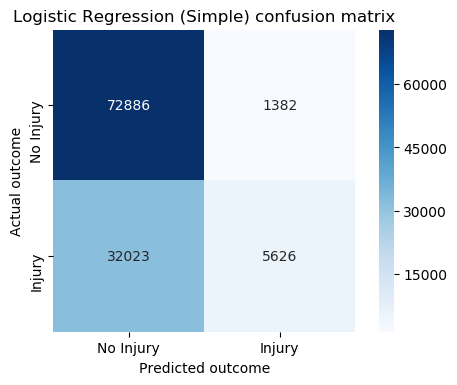

In [7]:
#Small Scale/Simple logistic Regression
##Testing to see how the model works with just a small subset of columns
baby_logr = LogisticRegression()
#baby_logr.fit(X_train, y_train)
small_list = ['Event Descriptor_Bike Collision', 'Event Descriptor_Pedestrian Collision',
              'Number of Vehicles Involved', 'Traffic Control Device_Traffic Device',
              'County Name_NASSAU']

baby_y = df.iloc[:,0]
baby_X = df.loc[:,small_list]

X_baby_train, X_baby_test, y_baby_train, y_baby_test = train_test_split(baby_X,baby_y, test_size=.2, random_state=1234)
X_baby_train, X_baby_val, y_baby_train, y_baby_val = train_test_split(X_baby_train ,y_baby_train, test_size=.25, random_state=1234)

baby_logr.fit(X_baby_train, y_baby_train)
print("Acc Score", baby_logr.score(X_baby_train, y_baby_train))
model_performance(baby_logr,"Logistic Regression (Simple)", X_baby_val, y_baby_val, hard=True, thres=.3)

### Logistic Regression

In [9]:
#Logistic Regression 
logr = LogisticRegression()
logr.fit(X_train, y_train)
print("Acc Score", logr.score(X_train, y_train))

/Users/danielobennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acc Score 0.7029971615870094


True Negatives:  45096
False Positives:  29172
False Negatives:  13185
True Positives:  24464
              precision    recall  f1-score   support

           0       0.77      0.61      0.68     74268
           1       0.46      0.65      0.54     37649

   micro avg       0.62      0.62      0.62    111917
   macro avg       0.61      0.63      0.61    111917
weighted avg       0.67      0.62      0.63    111917



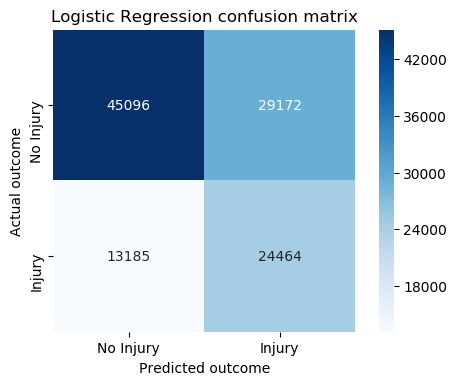

In [73]:
# Logistic Regression
model_performance(logr,"Logistic Regression", X_val, y_val, hard=False, thres=.325)

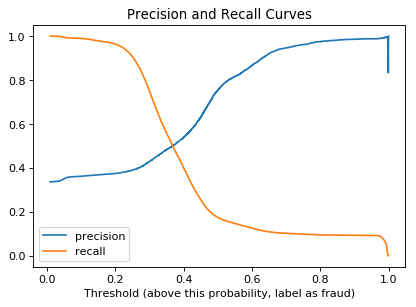

In [11]:
#### Plotting the recall/precision curve for logistic regression
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, logr.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');


ROC AUC score =  0.6922587409011622


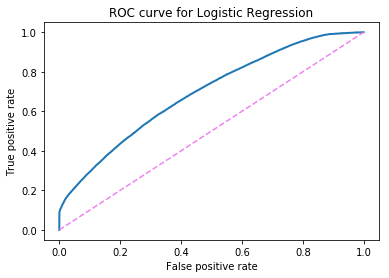

In [12]:
fpr, tpr, thresholds = roc_curve(y_val, logr.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Logistic Regression');
print("ROC AUC score = ", roc_auc_score(y_val, logr.predict_proba(X_val)[:,1]))

/Users/danielobennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


True Negatives:  47516
False Positives:  26752
False Negatives:  14409
True Positives:  23240
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     74268
           1       0.46      0.62      0.53     37649

   micro avg       0.63      0.63      0.63    111917
   macro avg       0.62      0.63      0.61    111917
weighted avg       0.67      0.63      0.64    111917



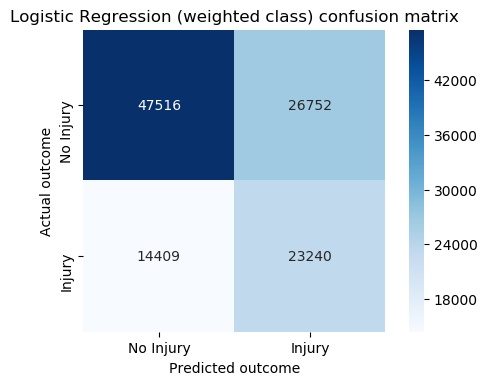

In [13]:
#logistic Weighted classes 
logr_weight = LogisticRegression(class_weight={1 : 2, 0 : 1})
logr_weight.fit(X_train, y_train)
model_performance(logr_weight,"Logistic Regression (weighted class)", X_val, y_val, hard=True, thres=.55)

The weighted classes increases the number of True Positives but also the False Positives so it essentially assumes that a car crash leads to an injury and that we should mostly always send an ambulance, which isnt that helpful as a model...

In [14]:
'''
Scaled Logistic Regression 
+try with class weighting 
'''
std_scaler = StandardScaler() #generate scalar object
std_scaler.fit(X_train.values)
X_scale_train = std_scaler.transform(X_train.values)
X_scale_val = std_scaler.transform(X_val.values)



In [15]:
log_scale = LogisticRegression()
log_scale.fit(X_scale_train, y_train)
print("Acc Score", log_scale.score(X_scale_train, y_train))

/Users/danielobennett/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acc Score 0.7030209887684623


True Negatives:  72112
False Positives:  2156
False Negatives:  31065
True Positives:  6584
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     74268
           1       0.75      0.17      0.28     37649

   micro avg       0.70      0.70      0.70    111917
   macro avg       0.73      0.57      0.55    111917
weighted avg       0.72      0.70      0.63    111917



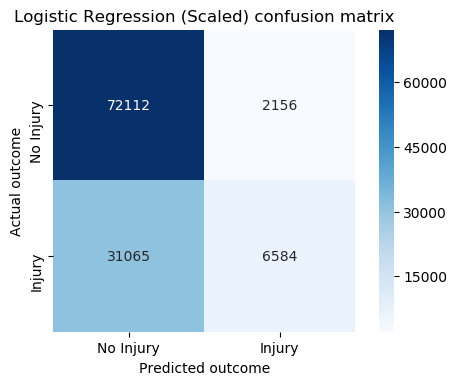

In [16]:
model_performance(log_scale,"Logistic Regression (Scaled)", X_scale_val, y_val, hard=True, thres=.35)

In [33]:
#coefficients for log regression - scaled so imporance is optimized 
#log_scale.coef_
feature_impor = list((zip(X_train.columns, log_scale.coef_[0])))
feature_impor = sorted(feature_impor, reverse=True, key=lambda x: x[1]) #reverse=True for positive features
print("Most important variables from Logistic Regression")
for index,item in enumerate(feature_impor):
    print(item)
    if index > 4:
        break

Most important variables from Logistic Regression
('Event Descriptor_Pedestrian Collision', 0.9076992171973343)
('Event Descriptor_Bike Collision', 0.4857463978839063)
('Number of Vehicles Involved', 0.42050284420080014)
('Traffic Control Device_Traffic Device', 0.15173425505252164)
('Curve_Road', 0.13735886152750135)
('Event Descriptor_Fixed Object Collision', 0.1312859734363827)
('Straight_Road', 0.1262565259007726)
('Event Descriptor_Non-Collision', 0.1220212066159825)
('Grade_Road', 0.10805114445470157)
('Level_Road', 0.1056838161402847)
('T_HIGH_F', 0.08799816824839815)
('Hour', 0.08679994495743129)
('County Name_ERIE', 0.08057350854843198)
('County Name_SUFFOLK', 0.0590560425158167)
('Hill_Road', 0.05362515073733721)
('County Name_WESTCHESTER', 0.02212663694526186)
('Month', 0.014345207123085839)
('Day of Week_Sunday', 0.014304241682281013)
('County Name_DUTCHESS', 0.012977801915481658)
('Day of Week_Saturday', 0.0075839153610012455)
('Day of Week_Monday', 0.004531154411132797)
(

### Results
Logistic Regression didnt work out well. At base threshold we get about .16-.17 recall and decreasing that threshold leads to a ton of false positives whcih essentially just lets us know that we should always send an ambulance when there is an accident. Lets keep it pushin tho



# Decision Tree

True Negatives:  49486
False Positives:  24782
False Negatives:  19533
True Positives:  18116
              precision    recall  f1-score   support

           0       0.72      0.67      0.69     74268
           1       0.42      0.48      0.45     37649

   micro avg       0.60      0.60      0.60    111917
   macro avg       0.57      0.57      0.57    111917
weighted avg       0.62      0.60      0.61    111917



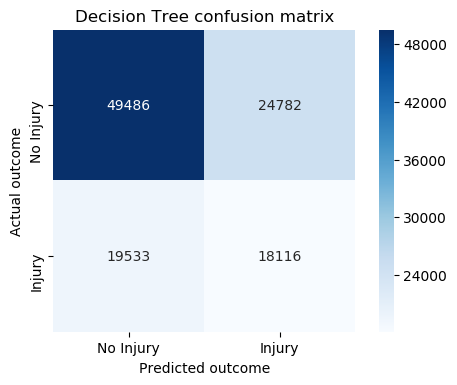

In [74]:
#First Decision Tree - Baseline
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)
tree1_pred = tree1.predict(X_val)
model_performance(tree1, "Decision Tree", X_val, y_val, hard=False, thres=.325)

ROC AUC score =  0.5802479889807374


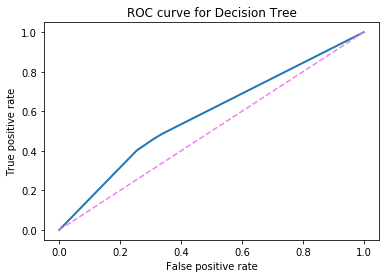

In [19]:
fpr, tpr, thresholds = roc_curve(y_val, tree1.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Decision Tree');
print("ROC AUC score = ", roc_auc_score(y_val, tree1.predict_proba(X_val)[:,1]))


In [20]:
feature_impor = list((zip(X_train.columns, tree1.feature_importances_)))
feature_impor = sorted(feature_impor, reverse=True, key=lambda x: x[1])
print("Most important variables")
for index,item in enumerate(feature_impor):
    print(item)
    if index > 4:
        break

Most important variables
('Hour', 0.20989838825893434)
('T_HIGH_F', 0.12956443407625268)
('WIND_MPH', 0.1269656207806942)
('Month', 0.07080756304906154)
('Event Descriptor_Pedestrian Collision', 0.04947101662234209)
('Event Descriptor_Animal Collision', 0.03193398008072279)


In [25]:
####LEFT HERE
#Cross Validation usage to check training/val
tree2 = DecisionTreeClassifier()
decision_cv = pd.DataFrame(cross_validate(tree2, X_train, y_train, cv=5, 
                                          scoring=['accuracy','precision','recall','f1'], return_train_score=True))
decision_cv.mean() #df is row of each model and cols of the metircs 

fit_time           4.920796
score_time         0.249030
test_accuracy      0.624883
train_accuracy     0.952428
test_precision     0.439554
train_precision    0.983987
test_recall        0.417976
train_recall       0.872806
test_f1            0.428492
train_f1           0.925067
dtype: float64

In [26]:
print(tree1.tree_.max_depth)
#print(tree3.tree_.max_depth)

66


True Negatives:  72853
False Positives:  1415
False Negatives:  31968
True Positives:  5681
              precision    recall  f1-score   support

           0       0.70      0.98      0.81     74268
           1       0.80      0.15      0.25     37649

   micro avg       0.70      0.70      0.70    111917
   macro avg       0.75      0.57      0.53    111917
weighted avg       0.73      0.70      0.63    111917



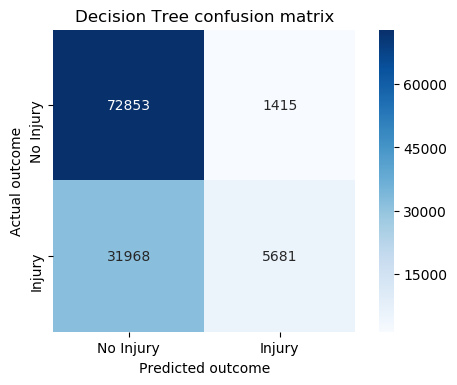

In [21]:
#simple data doesnt seem to work well with the tree
tree3 = DecisionTreeClassifier()
tree3.fit(X_baby_train, y_baby_train)
tree3_pred = tree3.predict(X_baby_val)
model_performance(tree3, "Decision Tree (simple)", X_baby_val, y_baby_val, hard=True, thres=.3)

### Results:
It seems that Decision Tree does a better job by default in terms of recall. Still too many False Negatives to be comfortable. But gives good reason to believe that Random Forest works well/ is in the right direction.

# Random Forest

In [22]:
##Random forest 1
#using sqrt(num_cols) for max_features
max_feats =   int(np.sqrt(len(X_train.columns)))
forest1 = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=10,
                                 #random_state=1234)
                                 random_state=1234, max_features= max_feats)
forest1.fit(X_train, y_train)
##forest1_pred = forest1.predict(X_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=1234, verbose=0, warm_start=False)

True Negatives:  45976
False Positives:  28292
False Negatives:  13617
True Positives:  24032
              precision    recall  f1-score   support

           0       0.77      0.62      0.69     74268
           1       0.46      0.64      0.53     37649

   micro avg       0.63      0.63      0.63    111917
   macro avg       0.62      0.63      0.61    111917
weighted avg       0.67      0.63      0.64    111917



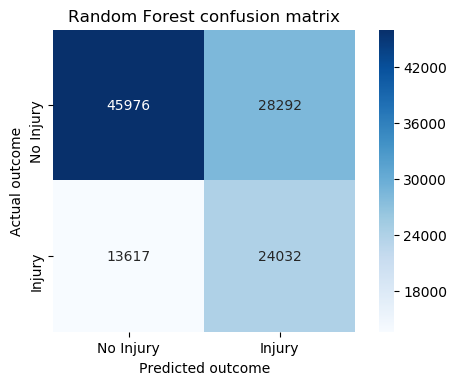

In [75]:
model_performance(forest1, "Random Forest", X_val, y_val, hard=False, thres=.325)

In [24]:
feature_impor = list((zip(X_train.columns, forest1.feature_importances_)))
feature_impor = sorted(feature_impor, reverse=True, key=lambda x: x[1])
print("Most important variables in Random Forest")
for index,item in enumerate(feature_impor):
    print(item)
    if index > 4:
        break

Most important variables in Random Forest
('Event Descriptor_Pedestrian Collision', 0.2613263559474996)
('Event Descriptor_Animal Collision', 0.1546399757917491)
('Event Descriptor_Bike Collision', 0.10656145521487595)
('Traffic Control Device_Traffic Device', 0.0983930942863985)
('Number of Vehicles Involved', 0.09443542070366095)
('Traffic Control Device_Unknown', 0.04038951979329011)


ROC AUC score =  0.6941528324298394


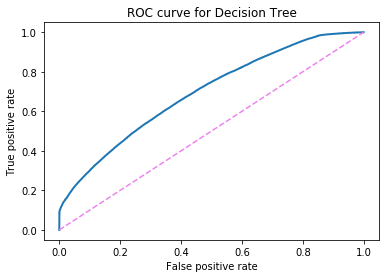

In [25]:
fpr, tpr, thresholds = roc_curve(y_val, forest1.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Random Forest');
print("ROC AUC score = ", roc_auc_score(y_val, forest1.predict_proba(X_val)[:,1]))


In [29]:
#forest
forest2 = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=None, 
                                 random_state=1234, max_features= max_feats)

decision_cv = pd.DataFrame(cross_validate(forest2, X_train, y_train, cv=5, 
                                          scoring=['accuracy','precision','recall','f1'], return_train_score=True))
decision_cv.mean() #df is row of each model and cols of the metircs 

KeyboardInterrupt: 

# XGBoost

In [27]:
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [43]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=60,
                       objective='binary:logistic',
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )
eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-error:0.206156	validation_1-error:0.336964
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.180434	validation_1-error:0.330557
[2]	validation_0-error:0.166781	validation_1-error:0.327654
[3]	validation_0-error:0.157364	validation_1-error:0.327323
[4]	validation_0-error:0.149051	validation_1-error:0.326349
[5]	validation_0-error:0.143737	validation_1-error:0.32626
[6]	validation_0-error:0.140262	validation_1-error:0.324946
[7]	validation_0-error:0.139374	validation_1-error:0.322158
[8]	validation_0-error:0.1346	validation_1-error:0.322471
[9]	validation_0-error:0.131309	validation_1-error:0.321819
[10]	validation_0-error:0.127338	validation_1-error:0.322337
[11]	validation_0-error:0.12411	validation_1-error:0.322158
[12]	validation_0-error:0.123875	validation_1-error:0.321712
[13]	validation_0-error:0.119624	validation_1-error:0.322069

In [92]:
fbeta_score(y_val, tree3_pred, beta=100)
#tree1_pred = tree1.predict(X_val)


0.8029113739888282

True Negatives:  36123
False Positives:  38145
False Negatives:  10440
True Positives:  27209
              precision    recall  f1-score   support

           0       0.78      0.49      0.60     74268
           1       0.42      0.72      0.53     37649

   micro avg       0.57      0.57      0.57    111917
   macro avg       0.60      0.60      0.56    111917
weighted avg       0.65      0.57      0.57    111917



'\n#.375              \nTrue Negatives:  48656\nFalse Positives:  25612\nFalse Negatives:  15099\nTrue Positives:  22550\n\n#.355\nTrue Negatives:  44093\nFalse Positives:  30175\nFalse Negatives:  12856\nTrue Positives:  24793\n\n#.325\nTrue Negatives:  32044\nFalse Positives:  42224\nFalse Negatives:  7748\nTrue Positives:  29901\n\n#.3\nTrue Negatives:  21902\nFalse Positives:  52366\nFalse Negatives:  4014\nTrue Positives:  33635\n\n#.25\nTrue Negatives:  13862\nFalse Positives:  60406\nFalse Negatives:  1376\nTrue Positives:  36273\n\n\n\n'

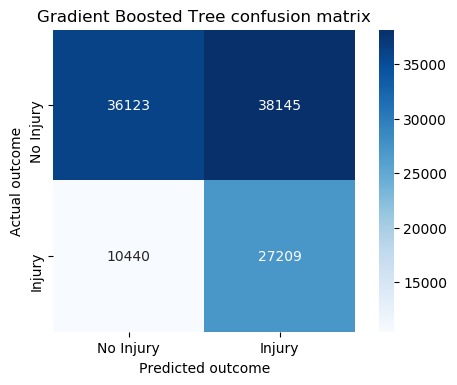

In [76]:
#xgb_pred = gbm.predict(X_train)
model_performance(gbm, "Gradient Boosted Tree", X_val, y_val, hard=False, thres=.325)

In [50]:
### We got the best one so run with it

In [53]:
print(X_test.shape)
print(y_test.shape)

(111917, 58)
(111917,)


True Negatives:  36152
False Positives:  38152
False Negatives:  10419
True Positives:  27194
              precision    recall  f1-score   support

           0       0.78      0.49      0.60     74304
           1       0.42      0.72      0.53     37613

   micro avg       0.57      0.57      0.57    111917
   macro avg       0.60      0.60      0.56    111917
weighted avg       0.66      0.57      0.57    111917



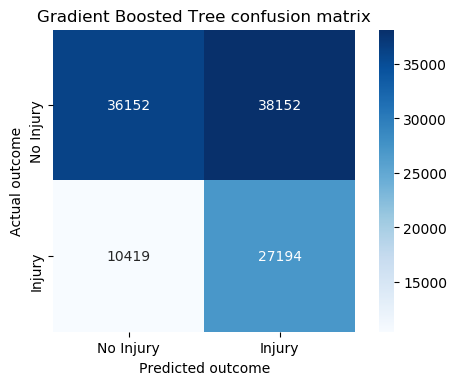

In [77]:
model_performance(gbm, "Gradient Boosted Tree", X_test, y_test, hard=False, thres=.325)